In [2]:
sentences = [
    # 20대
    "피로가 없는 삶, 마음을 나눌 친구가 있는 삶, 일에서 보람을 느끼는 삶, 도전을 즐기는 삶, 하나님을 굳건히 신뢰하는 삶",
    "매일 운동하고 취미생활 하나쯤은 가지며 적당한 수면시간을 가지는 것",
    "무너지지 않고 일상을 챙길 수 있는 삶. 제시간에 일어나서 밥 먹고 출퇴근하고 청소와 요리나 취미를 챙기는 등 자신에게 소홀하지 않은 일상",
    "루틴을 지키는 삶이 건강함을 만들어 주는 첫 번째라고 생각합니다",
    "스트레스를 받더라도 제때 풀 수 있고, 몸과 마음의 병이 없는, 자기 자신을 컨트롤할 수 있는 삶",
    # 30대
    "나의 라이프스타일에 맞는 주거공간, 워라밸 좋은 업무, 취미/운동 등 삶을 영위할 수 있는 시간과 돈",
    "신체적으로는 내가 하고 싶은 일들을 할 수 있는 체력이 있고, 정신적으로는 내 인생의 목표가 있고 행복함을 느끼고 있는지 여부",
    "긍정적인 마음가짐, 사람들과 어우러져 사는 삶, 일과 여가의 조화를 지키고, 자기 자신을 잃지 않는 삶",
    "아픈 곳 없고 건전한 취미활동이 있고 재정 상태가 위험하지 않으며 가족 간 불화가 없고 친구들과 즐겁게 교류하는 삶",
    "잘 먹고 잘 자고 스트레스받지 않는 삶",
    # 40대
    "몸에 불편한 곳이나 지병이 없고 근심, 걱정 없이 여유롭고 행복한 삶",
    "규칙적인 운동에 건강한 음식을 차려 먹을 수 있고 적당한 인간관계, 취미생활을 갖고 있으며, 이 시간과 생활을 지속적으로 영유할 수 있을 만큼 금전적으로 큰 어려움 없는 삶",
    "가족과 함께 따뜻한 집밥을 먹으며 운동과 함께 긍정적인 사고와 감사하는 마음으로 사는 것",
    "스트레스 없고 아픈 곳이 없고 평온한 삶",
    "현재를 즐기고 감사하며 하루하루를 열심히 살아가는 삶 비교하지 않는 삶",
    # 50대
    "안정된 일정 수입에 비례해 건강한 신체운동과 한 달에 한 번씩 가족들과 여행 등 무리 없는 생활을 할 수 있는 삶",
    "질병이 없는 것, 불행하다고 느끼지 않는 것, 불안과 근심이 없는 것",
    "아프지 않고 건강하게 가족들과 즐겁게 살아가는 것",
    "일상을 누리는 데 신체적으로 무리가 없는 상태, 걷는 것, 일하는 것 등 하고픈 것들을 마음껏 할 수 있는 상태에서 만족할 줄 아는 정신적 안정",
    "하루 걷기 7,000보 이상 실천하기, 다양한 채소 먹기, 명상하기",
    # 60대
    "시기하지 않고 미워하지 않고 욕심부리지 않고 내가 가진 것에 감사할 줄 알며 사는 삶",
    "건강한 몸으로 친구들과 여행도 많이 다니고 가족들과 대화하면서 즐겁게 사는 것",
    "죽기 전까지 치매 걸리지 않는 것",
    "마음이 편안하고, 남의 도움을 받지 않고, 스스로 원하는 일을 하며, 원하는 곳에 갈 수 있는 것",
    "땅과 흙을 밟으며 자연과 조화를 이루는 삶",
    "남편과 결혼한 자녀들과 주말에 만나서 식사하고 손주들과 함께 산책하기"
    ]

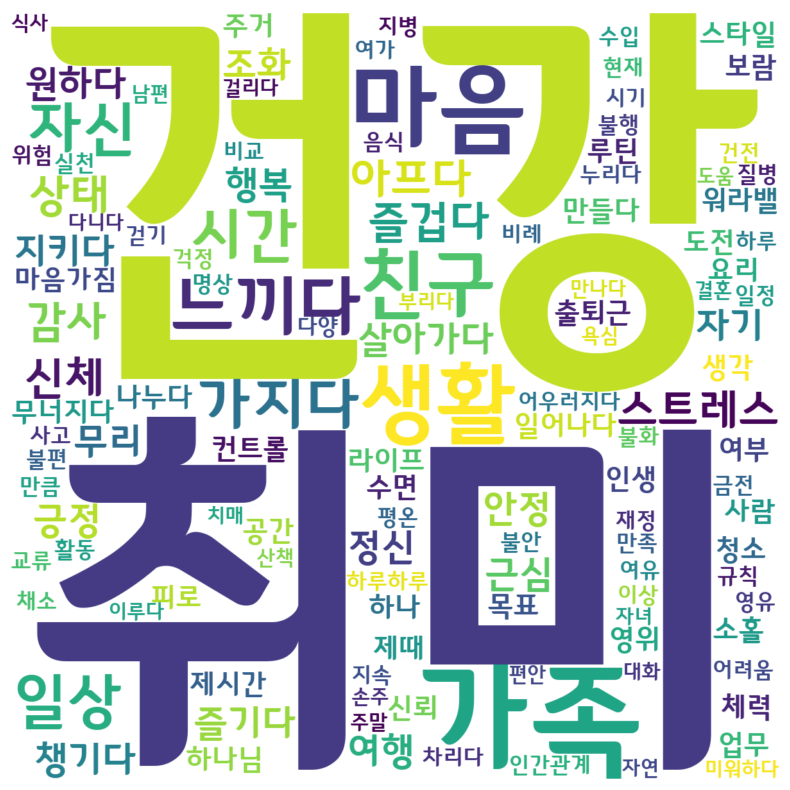

In [3]:
from kiwipiepy import Kiwi
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter

# Kiwi Tokenizer 초기화
kiwi = Kiwi()

# 모든 문장 토큰화
tokens = []
for sentence in sentences:
    # 형태소 분석 및 토큰화 수행
    result = kiwi.tokenize(sentence)
    tokens.extend([token.form if token.tag[0] != 'V' else token.form + '다' for token in result if len(token.form) > 1 and token.tag[0] in ('N', 'V') and token.form not in ('운동')])  # 길이가 1보다 큰 토큰만 사용

# 토큰 빈도 계산
counter = Counter(tokens)


wordcloud = WordCloud(font_path='/Users/idaeho/Documents/GitHub/PythonStudy/정선동강체(Bold)TTF.ttf',
                      background_color='white',
                      width=1200,
                      height=1200,
                      prefer_horizontal=1.0,
                      contour_width=3,
                      contour_color='black').generate_from_frequencies(counter)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
